# RAP Example Python Pipeline - Interactive Exercise

ADD THE GOOGLE COLAB LINK HERE

## Intro

This notebook will show you how straight-forward it is to do an analytical pipeline in Python.

The core of any of piece of analytical work is to:
- load some data
- do something to do that, e.g. process it, do some analysis
- create some output

This notebook will go briefly through each of these showing *one* way of doing it in Python (there are many more!). 

Open this notebook in google colab and have a play - try changing bits and see what happens!

**NOTE**: to make the workshop more straight forward, we haven't completely followed good practice. If you want to see a pipeline how it should be, well laid out and modularised, [see our Example Python pipeline](https://github.com/NHSDigital/RAP_example_pipeline_python).

## Setup

We will need to install a few things before we can get going.

First, if this is running in Google Colab, we need to clone the repo and install the right python packages.

In [ ]:
# this forces google collab to install the dependencies
if "google.colab" in str(get_ipython()):
    print("Running on Colab")
    !git clone https://github.com/NHSDigital/RAP_example_pipeline_python.git -q
    %cd RAP_example_pipeline_python
    !pip install -r requirements.txt -q -q

Next we need to import the right libraries for this piece of work:

In [1]:
# These libraries will help us download the file
import zipfile
import io
from pathlib import Path
import requests


import pandas as pd # this allows us to work with dataframes
import matplotlib.pyplot as plt # this allows us to create some graphs


## Config

Quite often, when we create an analytical process in code, there will be parts of the code that we need to update - dates, URLs, file paths, and so on.
 
We usually put these in a separate file called a config file. That way, all our settings are in one place. Here we'll just put our config settings in this cell below.

In [3]:
zip_file_url = "https://files.digital.nhs.uk/assets/Services/Artificial%20data/Artificial%20HES%20final/artificial_hes_ae_202302_v1_sample.zip"
path_to_downloaded_data = "data_in/artificial_hes_ae_202302_v1_sample.zip/artificial_hes_ae_202302_v1_sample/artificial_hes_ae_2122.csv"

# The column(s) we are going to investigate
cols_to_group = ["AEARRIVALMODE"]


## Load Data

First we will load the data: we're going to use an artificial fake version of the NHS Hospital Episode Statistics Accident and Emergency (HES AE) data from 2003. 


This code:
- gets the location of the data from the config file
- downloads the CSV
- saves it to our data_in folder

This is just an example - in another setting we could make it load the data from a SQL server, or from a database, S3 bucket, etc.

In [4]:
filename = Path(zip_file_url).name
output_path = f"data_in/{filename}"

response = requests.get(zip_file_url, stream=True,timeout=3600)
downloaded_zip = zipfile.ZipFile(io.BytesIO(response.content))
downloaded_zip.extractall(output_path)


Now we need to read in our data and store it so we can continue to use and manipulate it. We'll use the pandas method read_csv to turn the data within the csv file to a pandas dataframe (commonly referred to as df).

A pandas DataFrame is a two-dimensional, labeled data structure in Python, similar to a table in a database or an Excel spreadsheet, that allows for the storage and manipulation of data across rows and columns

In [5]:
df = pd.read_csv(path_to_downloaded_data)

Let's see what this data looks like, and pull the first 5 rows:

In [6]:
df.head(5)

,FYEAR,PARTYEAR,PSEUDO_HESID,AEKEY,AEKEY_FLAG,AEARRIVALMODE,AEATTEND_EXC_PLANNED,AEATTENDCAT,AEATTENDDISP,AEDEPTTYPE,...,LSOA11,MSOA11,PROVDIST,PROVDIST_FLAG,NER_GP_PRACTICE,NER_RESIDENCE,NER_TREATMENT,SITETRET,SITEDIST,SITEDIST_FLAG
0,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,910587081231,1,2,1,1,3,1,...,E01000385,E02001768,19.37,3.0,QKS,QKS,QHM,RW601,4.89,5.0
1,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,747777461989,1,2,1,1,3,1,...,E01030571,E02004833,3.96,3.0,QMJ,QYG,QKS,RY901,1.21,5.0
2,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,244053969711,1,2,1,1,3,3,...,E01008938,E02005828,NaN,3.0,QWE,QKK,QWO,RJC02,15.16,5.0
3,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,425257514835,1,2,1,1,1,1,...,E01030533,E02000912,23.68,3.0,QMJ,QRV,QOP,RJE07,3.16,5.0
4,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,892001219292,1,2,1,1,3,1,...,E01025434,E02004315,5.85,3.0,QMF,QM7,QMJ,RDE03,2.41,5.0


## Processing

Now the fun part - we get to do some interesting processing on the data.

Let's group the dataframe by the specified columns in cols_to_group, counts the number of rows in each group, and create a new column "Count" to show this.

In [7]:
df = df.groupby(cols_to_group).size().reset_index(name="Count")
print(df)


   AEARRIVALMODE  Count
0              1   2247
1              2   7362
2              9    391


It's a little confusing what those numbers mean, so let's put them into plain English

In [8]:
replace_names = {
    1: "Ambulance",
    2: "Other",
    9: "Not known"
}
df["AEARRIVALMODE"] = df["AEARRIVALMODE"].map(replace_names)
print(df)

  AEARRIVALMODE  Count
0     Ambulance   2247
1         Other   7362
2     Not known    391


## Visualising

Now it's time to take our dataframe and turn it into something nice to look at and easy to interpret!

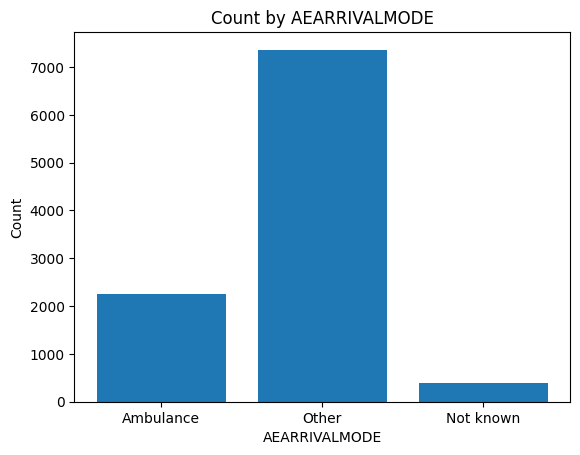

In [9]:
# Create a combined column for x-axis labels (helpful if you are going to combine two columns together)
df['Combined'] = df[cols_to_group[0]].astype(str)

# Plotting the bar chart
plt.bar(df['Combined'], df['Count'])

# Setting labels and title
plt.xlabel(f"{cols_to_group[0]}")
plt.ylabel('Count')
plt.title(f"Count by {cols_to_group[0]}")
plt.show()


## Changing Outputs

Due to how the code is written, you can easily swap what column you are investigating. Under "Config", try swapping the column in cols_to_group with one of the other columns listed here. Remember to update the name mapping too.

AEATTENDDISP - Attendance Disposal

AEINCLOCTYPE - Where incident occurred

AEREFSOURCE - Source of referral

ETHNOS - Ethnicity of patient

RESGOR_ONS - Region of Residence

SEX - Patient's Sex

Check out the HES Technical Output Specification to understand what each column mean and the possible options.

https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/hospital-episode-statistics/hospital-episode-statistics-data-dictionary





## Advanced

You could try grouping by two or more columns, to understand the data a little deeper.

You can add as many columns as you wish to the cols_to_group list, but in order to visualise them correctly you will need to combine them together:

**df['Combined'] = df[cols_to_group[0]].astype(str) + "-" + df[cols_to_group[1]].astype(str)**

Remember to update the title and labels too.